In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\netflix_titles.csv\netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Step 1: Dataset Overview
- Shape, Info, Missing Value, Duplicate value

In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df.duplicated().sum()

0

**Dataset Overview Observations**
- We have a dataframe consisting of 8807 rows and 12 columns.
- Our dataset looks clean but has some missing values in 'director', 'cast', and 'country' columns.
- There are no duplicate rows in the dataset.
- Mostly categorical columns, only release_year is numeric.
- The 'date_added' column needs to be converted to datetime to extract year and month for analysis.


### Step 2: Date Cleaning

In this step:
- Convert the `date_added` column to datetime format.



In [8]:
df["date_added"]=pd.to_datetime(df["date_added"],errors="coerce")

In [9]:
df["date_added"]

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

### Step 3: Rating Cleaning & Categorization

In this step:
- Clean the `rating` column by removing invalid values like `90 min` and `1 Season`.
- Keep only original rating values like `TV-MA`, `PG`, etc.
- Categorize ratings into 4 groups: Popular, Average, Below Average, and Not Popular.


In [10]:
rating_map = {
    'TV-MA': 'Popular',
    'R': 'Popular',
    'PG': 'Average',
    'PG-13': 'Average',
    'TV-14': 'Average',
    'G': 'Below Average',
    'TV-G': 'Below Average',
    'TV-Y': 'Below Average',
    'TV-Y7': 'Below Average',
    'TV-Y7-FV': 'Below Average',
    'NR': 'Not Popular',
    'UR': 'Not Popular'
}

df['rating_category'] = df['rating'].map(rating_map)
df.dropna(subset=['rating_category'], inplace=True)


In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Average
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Popular
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Popular
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Popular
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Popular


In [12]:
df['rating_category'].unique()


array(['Average', 'Popular', 'Below Average', 'Not Popular'], dtype=object)

### Step 4: Missing Values Handling

In this step:
- We handle missing values in `director`, `cast`, and `country` columns.
- Filling missing values with `'Unknown'` ensures that the dataset is clean.
- This prevents issues in visualizations and analysis.


In [13]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')


In [14]:
df.isna().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added         73
release_year        0
rating              0
duration            0
listed_in           0
description         0
rating_category     0
dtype: int64

In [15]:
cols=['show_id','description','cast','date_added','rating']

In [16]:
df.drop(cols,axis=1 , inplace=True)

In [17]:
df.columns

Index(['type', 'title', 'director', 'country', 'release_year', 'duration',
       'listed_in', 'rating_category'],
      dtype='object')

### Step 5: Genre Analysis (Listed_in Column)

In this step:
- We analyze the `listed_in` column to find the most popular genres.
- Since a single title can belong to multiple genres, we split the values and count each genre individually.



In [18]:
df['listed_in'] = df['listed_in'].str.split(', ')
df = df.explode('listed_in').reset_index(drop=True)

In [19]:
df.head()

,type,title,director,country,release_year,duration,listed_in,rating_category
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,90 min,Documentaries,Average
1,TV Show,Blood & Water,Unknown,South Africa,2021,2 Seasons,International TV Shows,Popular
2,TV Show,Blood & Water,Unknown,South Africa,2021,2 Seasons,TV Dramas,Popular
3,TV Show,Blood & Water,Unknown,South Africa,2021,2 Seasons,TV Mysteries,Popular
4,TV Show,Ganglands,Julien Leclercq,Unknown,2021,1 Season,Crime TV Shows,Popular


In [20]:
df.info()           #records increased 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17399 entries, 0 to 17398
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   type             17399 non-null  object
 1   title            17399 non-null  object
 2   director         17399 non-null  object
 3   country          17399 non-null  object
 4   release_year     17399 non-null  int64 
 5   duration         17399 non-null  object
 6   listed_in        17399 non-null  object
 7   rating_category  17399 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.1+ MB


In [21]:
df.nunique()

type                  2
title              7934
director           4179
country             706
release_year         71
duration            215
listed_in            42
rating_category       4
dtype: int64

## Step 6: Data Visualization

### Top 10 Most Frequent Genres of Movies Released on Netflix

In [22]:
df["listed_in"].describe()

count                    17399
unique                      42
top       International Movies
freq                      2456
Name: listed_in, dtype: object

Text(0.5, 1.0, 'Top 10 Most Frequent Genres on Netflix')

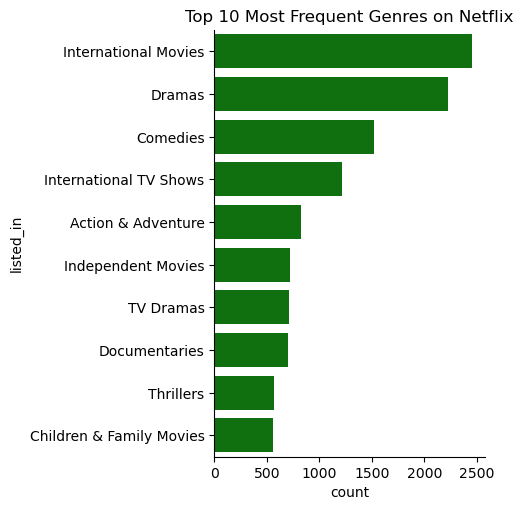

In [23]:
top_genres = df['listed_in'].value_counts().head(10).index

sns.catplot(
    y='listed_in',
    data=df[df['listed_in'].isin(top_genres)],
    kind='count',
    order=top_genres,
    color="green")
plt.title('Top 10 Most Frequent Genres on Netflix')

# Distribution of Movies by Popularity Category


In [24]:
df['rating_category'].value_counts()

rating_category
Popular          8892
Average          6851
Below Average    1480
Not Popular       176
Name: count, dtype: int64

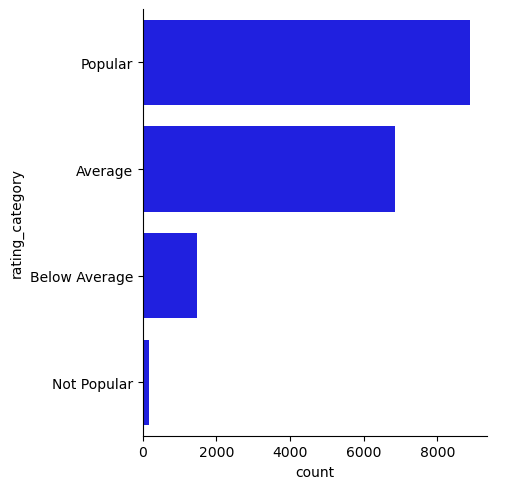

In [25]:
sns.catplot(y="rating_category",data=df,
            kind="count", color="blue",
           order=['Popular','Average','Below Average','Not Popular'])

# Number of Movies Released Per Year on Netflix

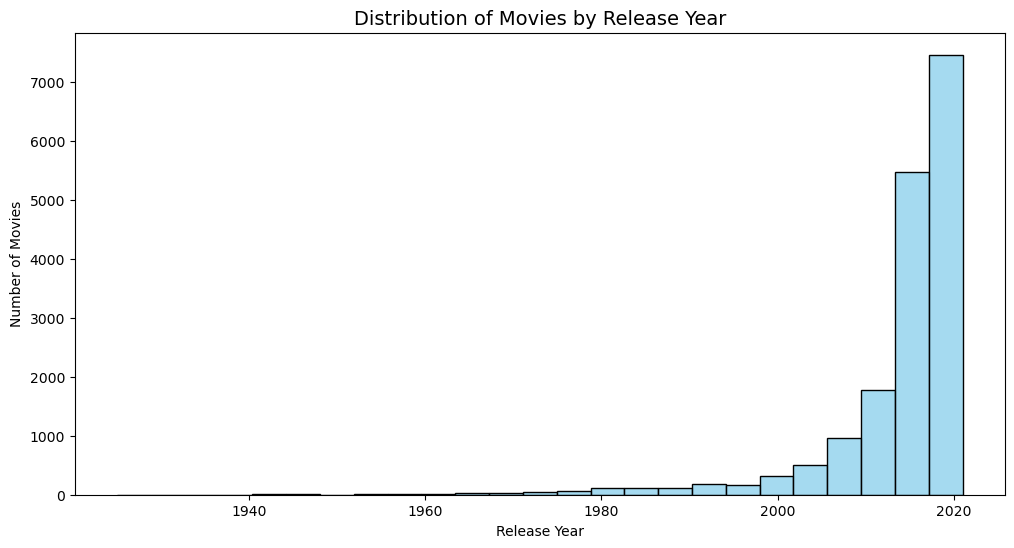

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df['release_year'], bins=25, color='skyblue')
plt.title('Distribution of Movies by Release Year', fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

# Movies vs TV Shows on Netflix

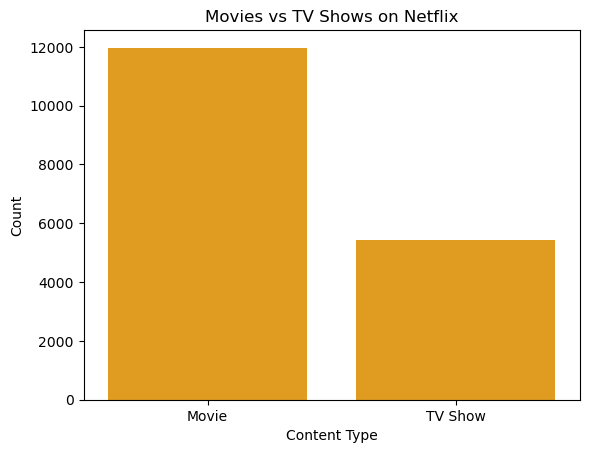

In [27]:
sns.countplot(x='type', data=df, color='orange')
plt.title('Movies vs TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

# Top 10 Countries Producing Movies on Netflix

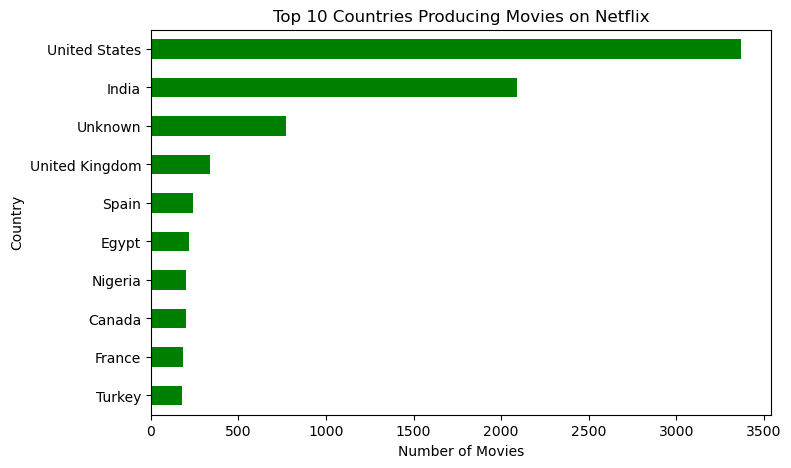

In [28]:
movies_df = df[df['type'] == 'Movie']

# Top 10 countries
top_countries = movies_df['country'].value_counts().head(10)

# Bar chart
top_countries.plot(kind='barh', color='green', figsize=(8,5))
plt.title('Top 10 Countries Producing Movies on Netflix')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Top country upar show ho
plt.show()
